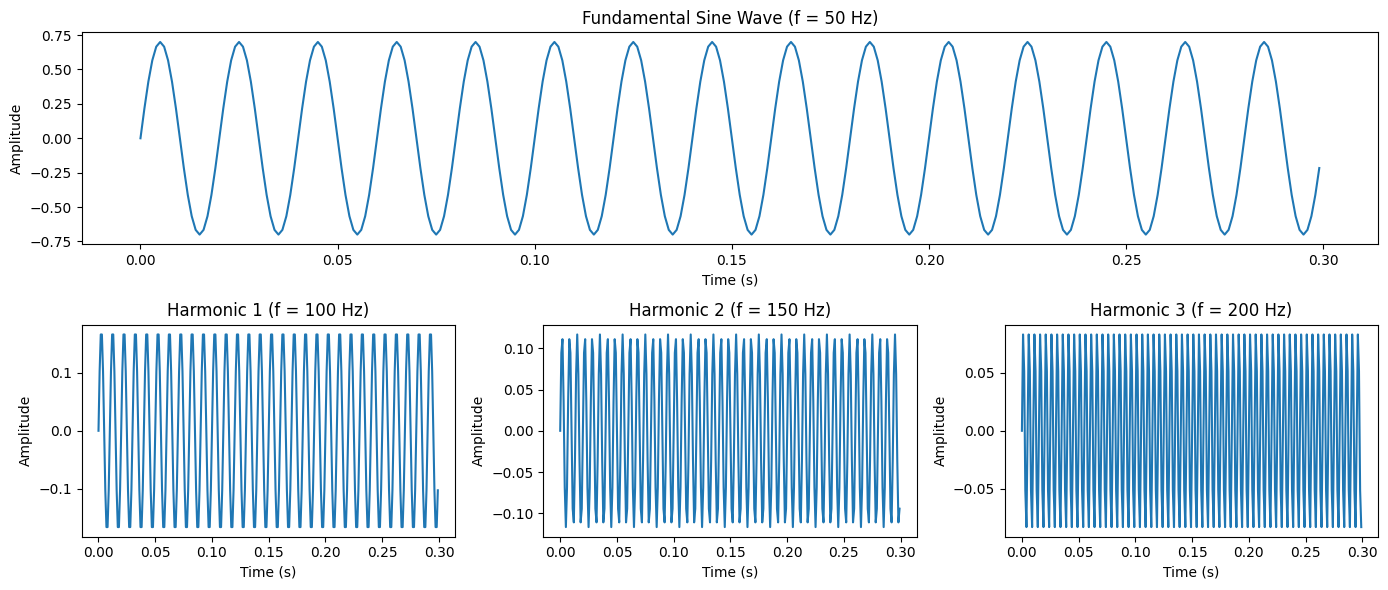

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sine wave parameters
Fs = 1000  # Sampling frequency in Hz
T = 1/Fs  # Sampling period in seconds
L = 1500  # Length of the signal (number of samples)
t = np.arange(0, L) * T  # Time vector

f = 50  # Frequency of the sine wave in Hz
A = 0.7  # Amplitude of the sine wave

# Generate the fundamental sine wave
X = A * np.sin(2 * np.pi * f * t)

# Plot the fundamental sine wave
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t[0:300], X[0:300])  # Plotting a portion to see the waveform clearly
plt.title('Fundamental Sine Wave (f = 50 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Harmonics
numHarmonics = 3  # Number of harmonics to add

# Plot each harmonic
for n in range(1, numHarmonics + 1):
    harmonicFrequency = f * (n + 1)  # Frequency of the nth harmonic
    harmonicAmplitude = A / (2 * (n + 1))  # Amplitude of the nth harmonic (example decreasing function)
    harmonicSignal = harmonicAmplitude * np.sin(2 * np.pi * harmonicFrequency * t)

    plt.subplot(2, numHarmonics, numHarmonics + n)
    plt.plot(t[0:300], harmonicSignal[0:300])  # Plotting a portion to see the waveform clearly
    plt.title(f'Harmonic {n} (f = {harmonicFrequency} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


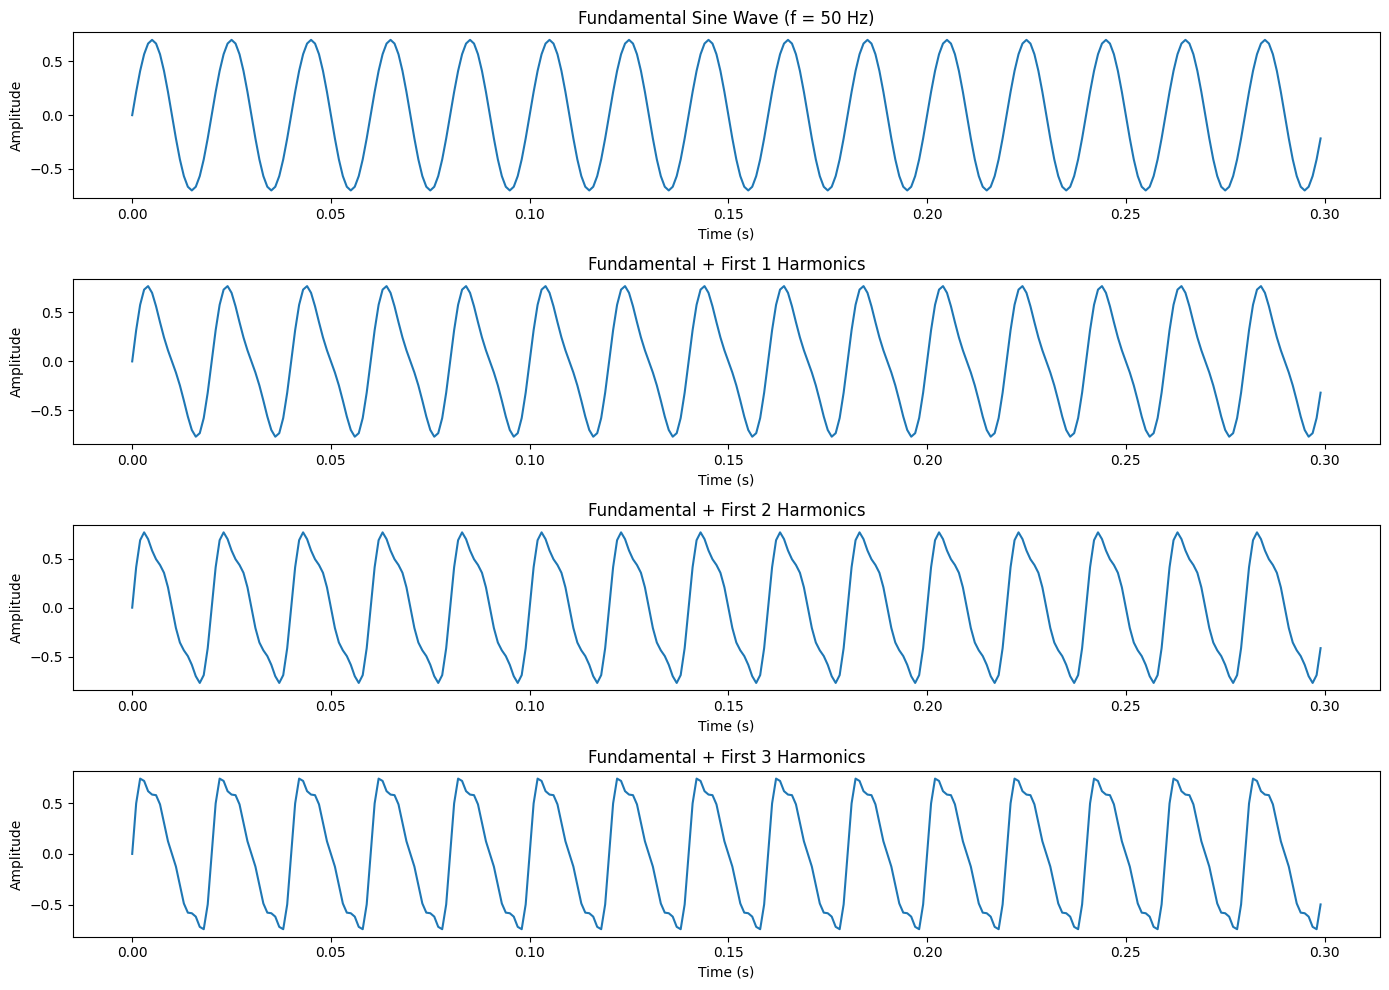

In [ ]:
# Initialize the signal with just the fundamental frequency
X_total = A * np.sin(2 * np.pi * f * t)

# Prepare the plots
fig, axs = plt.subplots(numHarmonics + 1, 1, figsize=(14, 10))

# Plot the fundamental frequency
axs[0].plot(t[0:300], X_total[0:300])
axs[0].set_title('Fundamental Sine Wave (f = 50 Hz)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

# Add harmonics and plot the cumulative signal after each addition
for n in range(1, numHarmonics + 1):
    harmonicFrequency = f * (n + 1)  # Frequency of the nth harmonic
    harmonicAmplitude = A / (2 * (n + 1))  # Decreasing amplitude for each harmonic
    harmonicSignal = harmonicAmplitude * np.sin(2 * np.pi * harmonicFrequency * t)

    # Add the current harmonic to the total signal
    X_total += harmonicSignal

    # Plot the resulting signal after adding the current harmonic
    axs[n].plot(t[0:300], X_total[0:300])
    axs[n].set_title(f'Fundamental + First {n} Harmonics')
    axs[n].set_xlabel('Time (s)')
    axs[n].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


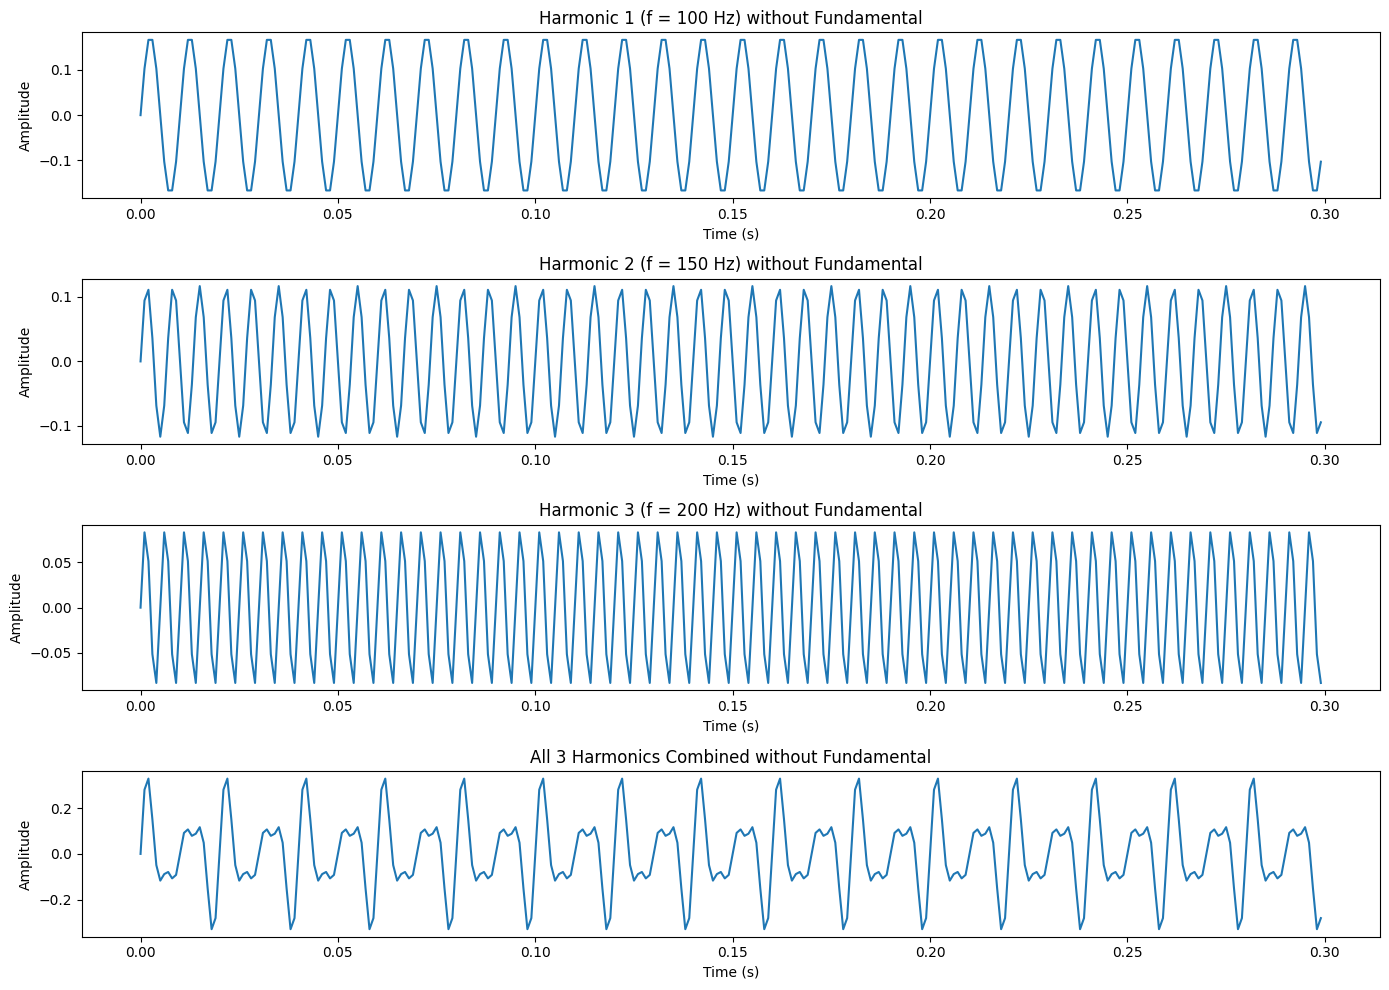

In [ ]:
# Prepare the plots for each harmonic without the fundamental frequency, and then all harmonics combined
fig, axs = plt.subplots(numHarmonics + 1, 1, figsize=(14, 10))

# Variable to hold the cumulative signal of all harmonics (without the fundamental)
X_harmonics_only = np.zeros(L)

# Plot each harmonic individually
for n in range(1, numHarmonics + 1):
    harmonicFrequency = f * (n + 1)  # Frequency of the nth harmonic
    harmonicAmplitude = A / (2 * (n + 1))  # Decreasing amplitude for each harmonic
    harmonicSignal = harmonicAmplitude * np.sin(2 * np.pi * harmonicFrequency * t)

    # Add the current harmonic signal to the cumulative harmonics signal
    X_harmonics_only += harmonicSignal

    # Plot the individual harmonic
    axs[n - 1].plot(t[0:300], harmonicSignal[0:300])
    axs[n - 1].set_title(f'Harmonic {n} (f = {harmonicFrequency} Hz) without Fundamental')
    axs[n - 1].set_xlabel('Time (s)')
    axs[n - 1].set_ylabel('Amplitude')

# Plot the cumulative signal of all harmonics (without the fundamental)
axs[numHarmonics].plot(t[0:300], X_harmonics_only[0:300])
axs[numHarmonics].set_title(f'All {numHarmonics} Harmonics Combined without Fundamental')
axs[numHarmonics].set_xlabel('Time (s)')
axs[numHarmonics].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


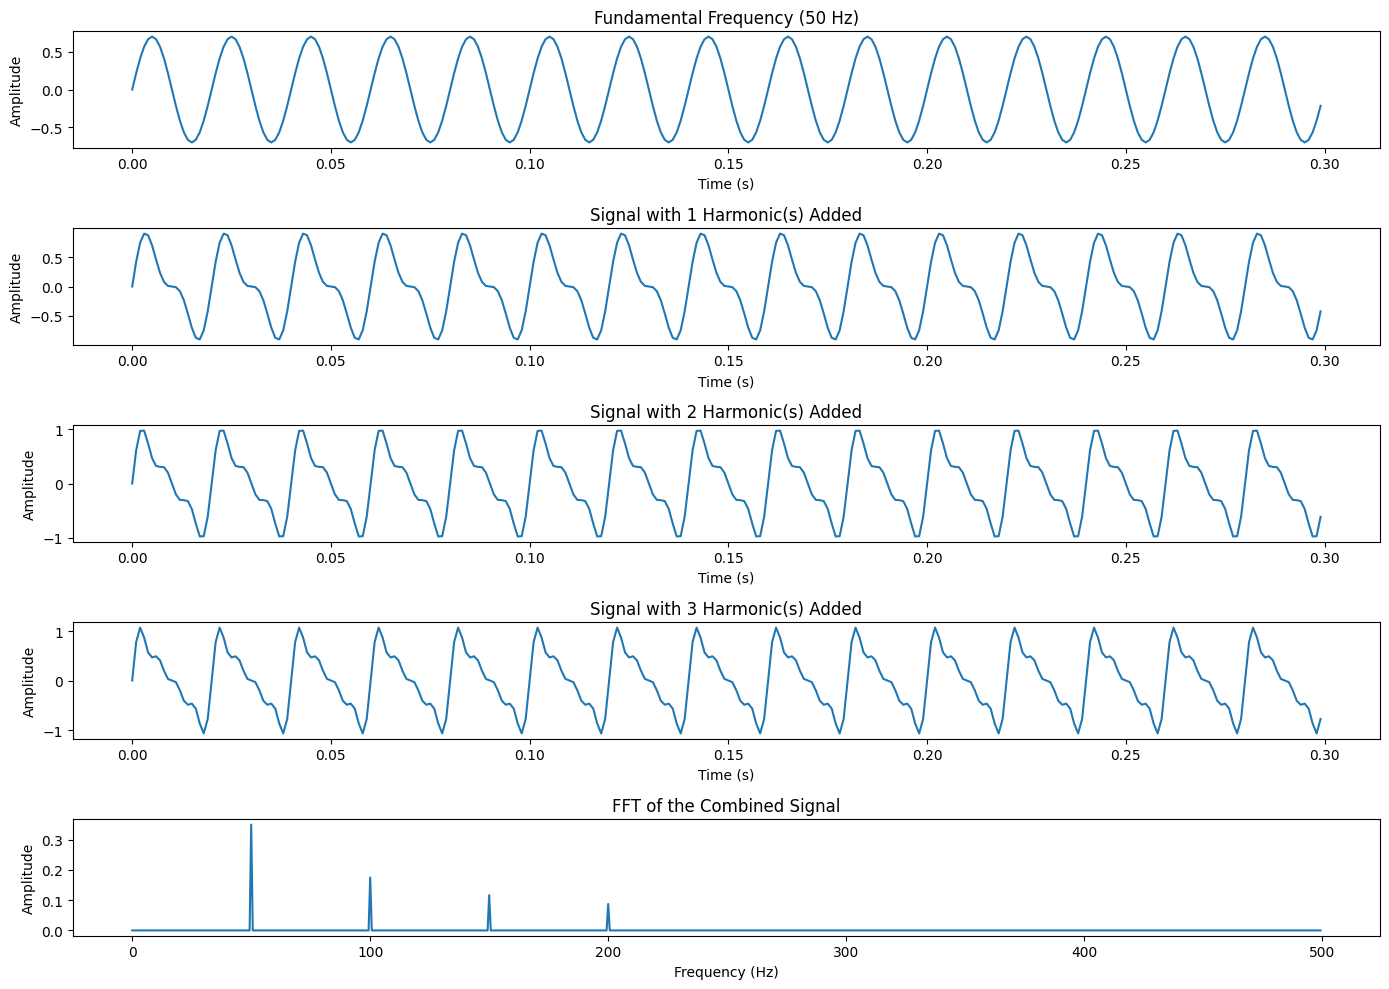

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Signal parameters
Fs = 1000  # Sampling frequency
T = 1/Fs  # Sampling period
L = 1500  # Length of the signal
t = np.arange(0, L) * T  # Time vector

f = 50  # Fundamental frequency (Hz)
A = 0.7  # Amplitude of the fundamental frequency

# Initialize the signal with the fundamental frequency
X = A * np.sin(2 * np.pi * f * t)

# Prepare the figure
plt.figure(figsize=(14, 10))

# Plot the fundamental frequency
plt.subplot(5, 1, 1)
plt.plot(t[0:300], X[0:300])
plt.title('Fundamental Frequency (50 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Number of harmonics
numHarmonics = 3

# Adding harmonics
for n in range(1, numHarmonics + 1):
    harmonicFrequency = f * (n + 1)  # Frequency of nth harmonic
    harmonicAmplitude = A / (n + 1)  # Decreasing amplitude for each harmonic
    harmonicSignal = harmonicAmplitude * np.sin(2 * np.pi * harmonicFrequency * t)  # No phase shift added
    X += harmonicSignal  # Add harmonic to the signal

    # Plot signal with current number of harmonics
    plt.subplot(5, 1, n + 1)
    plt.plot(t[0:300], X[0:300])
    plt.title(f'Signal with {n} Harmonic(s) Added')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

# Compute and plot the FFT of the final signal
Y = fft(X)
P2 = abs(Y/L)
P1 = P2[:L//2]
frequencies = Fs * np.arange(0, L/2) / L

plt.subplot(5, 1, 5)
plt.plot(frequencies, P1)
plt.title('FFT of the Combined Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
